In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPooling2D
from keras.layers.convolutional import Conv2D

In [3]:
asl_ds = tf.keras.preprocessing.image_dataset_from_directory('./asl_dataset')

Found 2515 files belonging to 36 classes.


In [4]:
class_names=asl_ds.class_names
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

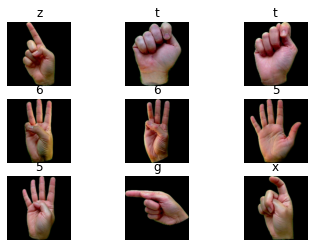

In [5]:
for images, labels in asl_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
minValue = 70
data=[]
def func(path):    
    frame = cv2.imread(path)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    resized = cv2.resize(res,(128,128), interpolation = cv2.INTER_AREA)
    data.append(resized)
    return resized

<class 'numpy.ndarray'>


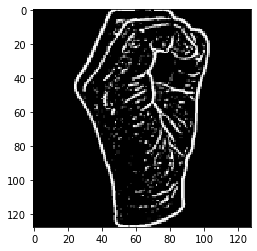

In [8]:
arr=func('./asl_dataset/0/hand5_0_dif_seg_2_cropped.jpeg')
print(type(arr))
plt.imshow(arr, interpolation='nearest',cmap='Greys')
plt.show()

In [9]:
def img_preprocess(path):
    for class_name in class_names:
        files=glob.glob(path+'/'+class_name)
        listOfImg=os.listdir(files[0])
        for i in listOfImg:
            # print(files[0]+"/"+i)
            ele=func(files[0]+"/"+i)
            # data.append(ele)
            X.append(ele)
            y.append(class_name)

In [10]:
X=[]
y=[]
img_preprocess('./asl_dataset')

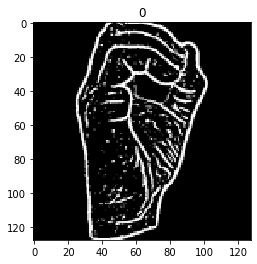

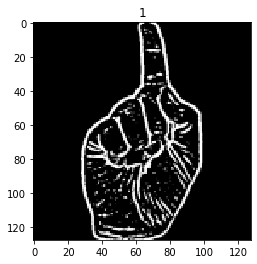

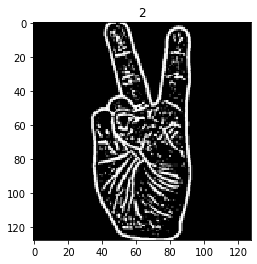

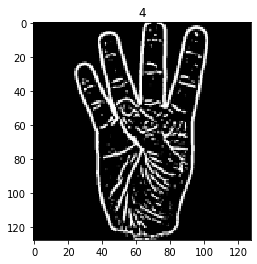

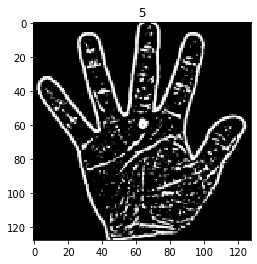

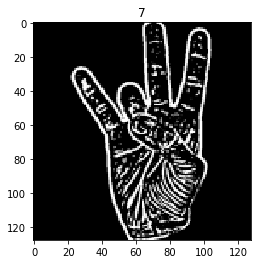

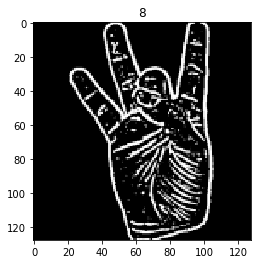

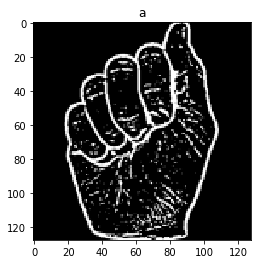

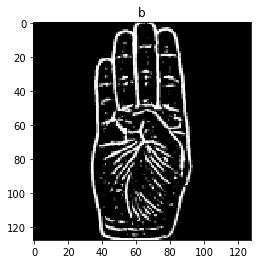

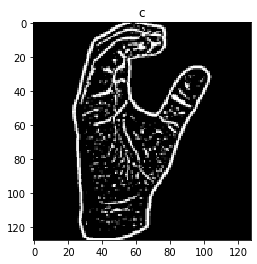

In [11]:
for i in range(0,1000,100):
    plt.imshow(X[i], interpolation='nearest',cmap='Greys')
    plt.title(y[i])
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=np.array(X)
y=np.array(y)
X.shape

(2515, 128, 128)

In [14]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [18]:
model.fit(X_train, y_train, epochs=15, verbose=2, validation_data=(X_test, y_test))

Epoch 1/15
63/63 - 31s - loss: 3.5833 - accuracy: 0.0278 - val_loss: 3.5873 - val_accuracy: 0.0139 - 31s/epoch - 487ms/step
Epoch 2/15


KeyboardInterrupt: 

In [ ]:
model.save("model/CNN.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model=load_model("model/CNN.h5")

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
pred=[]
for i in y_pred:
    # print(i.argmax(axis=0))
    pred.append(i.argmax(axis=0))

In [ ]:
pred=np.array(pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

In [ ]:
Y